In [51]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [52]:
#reading the data
data=pd.read_csv('diabetes.csv')

In [53]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [54]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [55]:
#checking for null values;There are none
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [56]:
#CREATING THE X COLUMNS
x=data.drop("Outcome",axis=1)

In [57]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


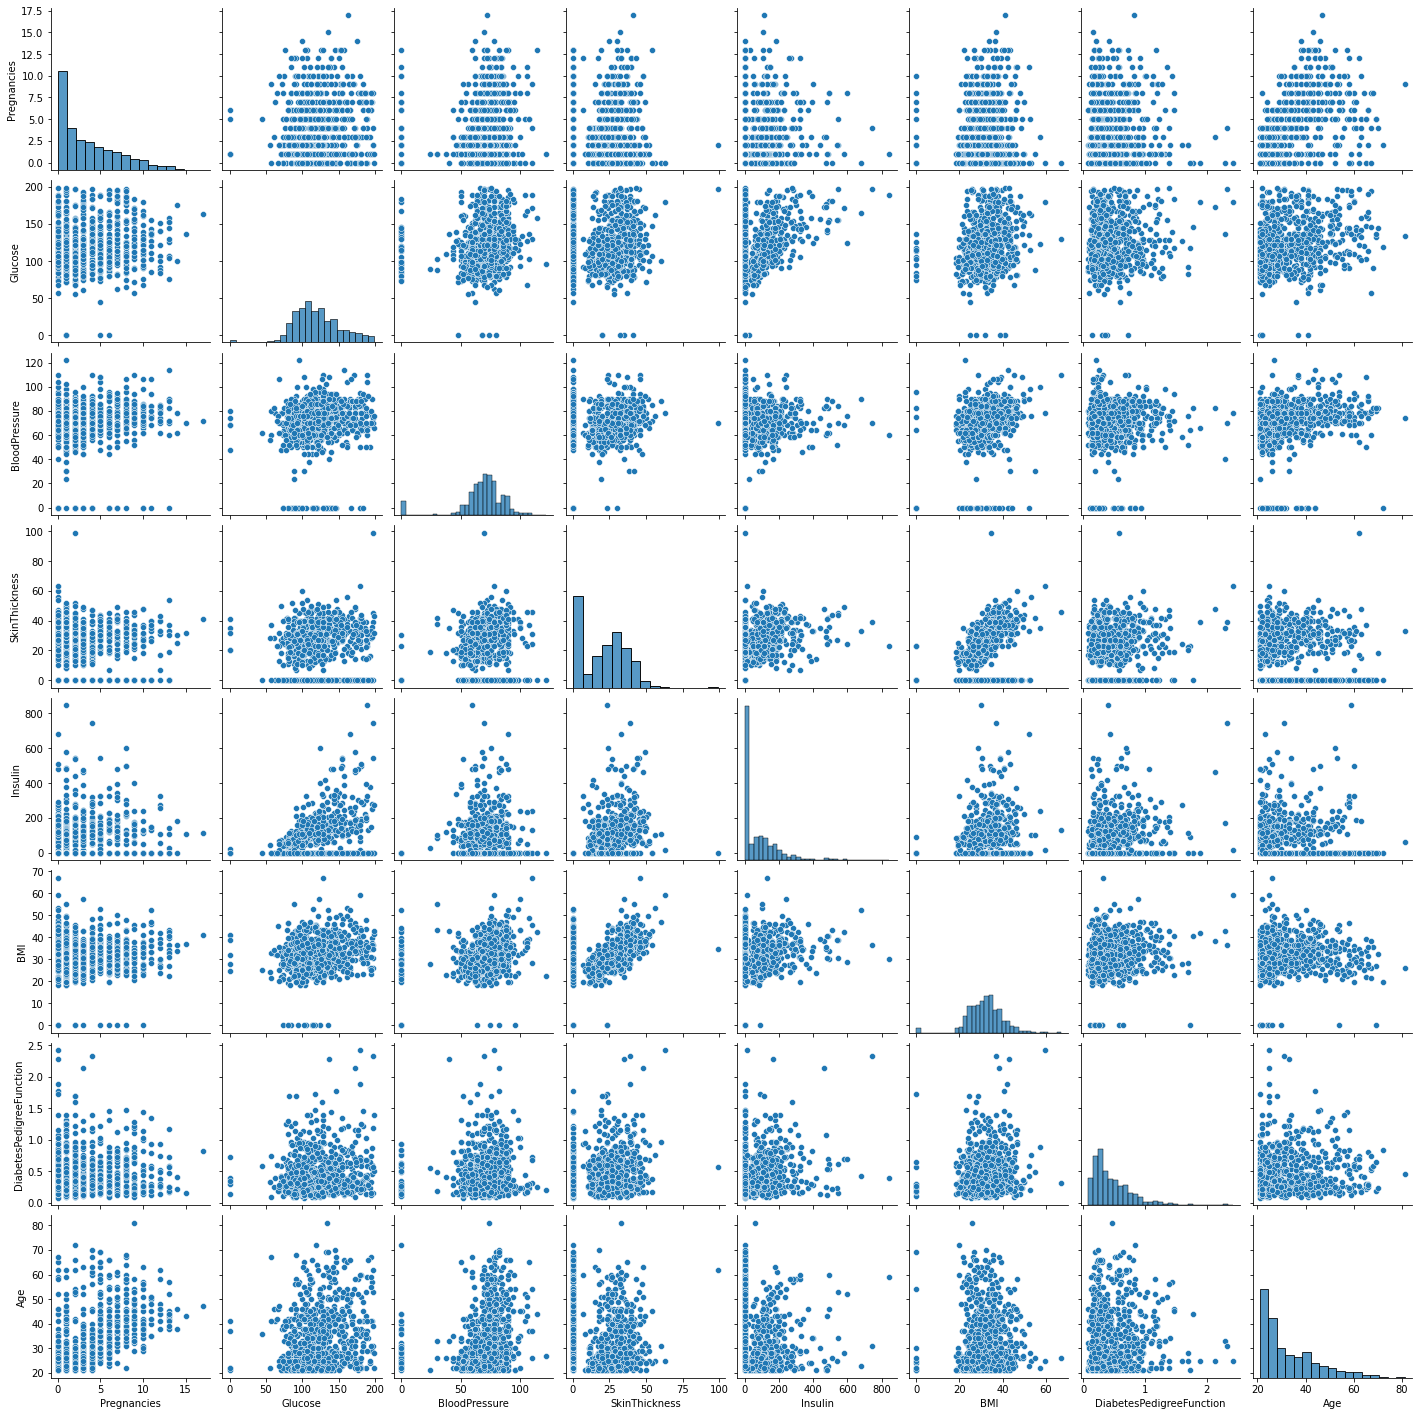

In [58]:
#PREPARING A PAIRPLOT
sns.pairplot(x)

<AxesSubplot:>

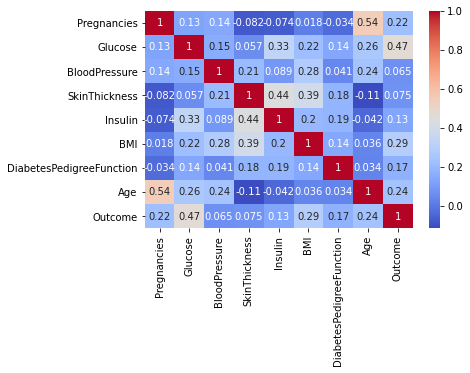

In [59]:
#CHECKING FOR CORRELATION BETWEEN COLUMNS TO SEE IF WE CAN DROP ANY
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

In [60]:
x=data

In [61]:
#CHECKING AND REMOVING THE OUTLIERS IF ANY
#IQR=75th PERCENTILE VALUE-25th PERCENTILE VALUE
#LOWER_LIMIT=Q1-1.5*(IQR)
#UPPER_LIMIT=Q3+1.5*(IQR) DATA  MUST LIE BETWEEN UPPER_LIMIT AND LOWER_LIMIT (INCLUDEUPPER AND LOWER LIMIT)
Q1=x.quantile(0.25)
Q3=x.quantile(0.75)

In [62]:
iqr=Q3-Q1

In [63]:
iqr

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64

In [64]:
lower_limit=Q1-1.5*(iqr)
upper_limit=Q3+1.5*(iqr)
lower_limit,upper_limit

(Pregnancies                  -6.500
 Glucose                      37.125
 BloodPressure                35.000
 SkinThickness               -48.000
 Insulin                    -190.875
 BMI                          13.350
 DiabetesPedigreeFunction     -0.330
 Age                          -1.500
 Outcome                      -1.500
 dtype: float64,
 Pregnancies                  13.500
 Glucose                     202.125
 BloodPressure               107.000
 SkinThickness                80.000
 Insulin                     318.125
 BMI                          50.550
 DiabetesPedigreeFunction      1.200
 Age                          66.500
 Outcome                       2.500
 dtype: float64)

c:\python\python395\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

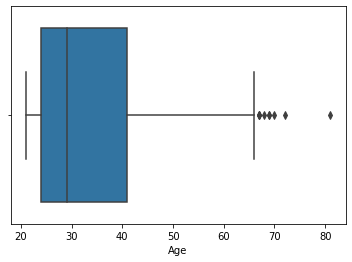

In [65]:
sns.boxplot(x['Age'])

c:\python\python395\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Glucose'>

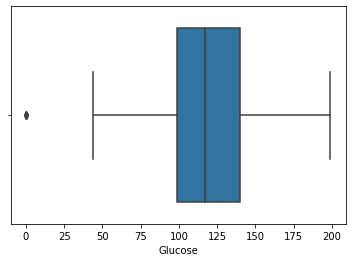

In [66]:
sns.boxplot(x['Glucose'])

c:\python\python395\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BloodPressure'>

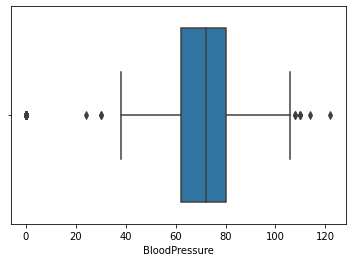

In [67]:
sns.boxplot(x['BloodPressure'])

c:\python\python395\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

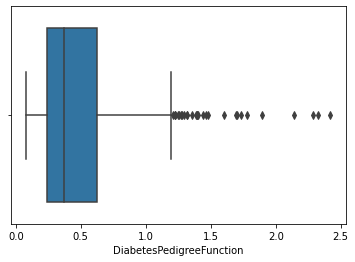

In [68]:
sns.boxplot(x['DiabetesPedigreeFunction'])

c:\python\python395\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI'>

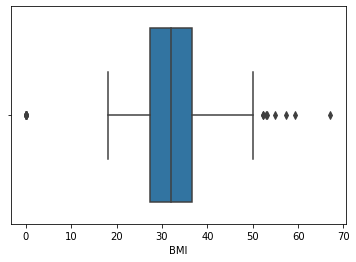

In [69]:
sns.boxplot(x['BMI'])

c:\python\python395\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

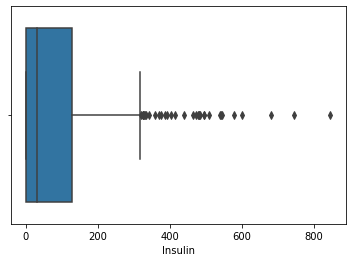

In [70]:
sns.boxplot(x['Insulin'])

c:\python\python395\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SkinThickness'>

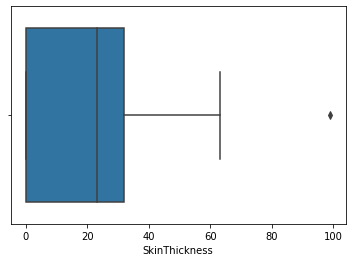

In [71]:
sns.boxplot(x['SkinThickness'])

c:\python\python395\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pregnancies'>

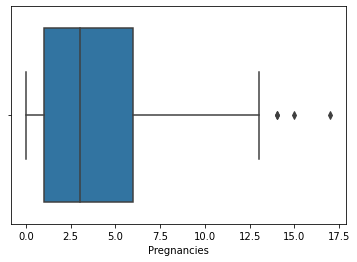

In [72]:
sns.boxplot(x['Pregnancies'])

In [73]:
x=x[(x.Pregnancies>lower_limit.Pregnancies)&(x.Pregnancies<upper_limit.Pregnancies)]
x=x[(x.Glucose>lower_limit.Glucose)&(x.Glucose<upper_limit.Glucose)]
x=x[(x.BloodPressure>lower_limit.BloodPressure)&(x.BloodPressure<upper_limit.BloodPressure)]
x=x[(x.SkinThickness>lower_limit.SkinThickness)&(x.SkinThickness<upper_limit.SkinThickness)]
x=x[(x.Insulin>lower_limit.Insulin)&(x.Insulin<upper_limit.Insulin)]
x=x[(x.BMI>lower_limit.BMI)&(x.BMI<upper_limit.BMI)]
x=x[(x.DiabetesPedigreeFunction>lower_limit.DiabetesPedigreeFunction)&(x.DiabetesPedigreeFunction<upper_limit.DiabetesPedigreeFunction)]
x=x[(x.Age>lower_limit.Age)&(x.Age<upper_limit.Age)]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [74]:
#ISOLATING THE TARGET VARIABLES
y=x['Outcome']
x=x.drop('Outcome',axis=1)

In [75]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 639, dtype: int64

In [76]:
print(set(y))
print(len(set(y)))

{0, 1}
2


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [79]:
#USING DECISION TREE ALGORITHM
from sklearn import tree

In [80]:
model=tree.DecisionTreeClassifier()

In [81]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [82]:
model.score(x_test,y_test)

0.75

In [104]:

model.predict([[0,89,72,23,88,26.7,0.53,25]])

array([0], dtype=int64)

In [83]:
#USING RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier

In [84]:
model=RandomForestClassifier()

In [85]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [86]:
model.score(x_test,y_test)

0.71875

In [105]:
model.predict([[0,89,72,23,88,26.7,0.53,25]])

array([0], dtype=int64)

In [87]:
#USING LOGISTIC REGRESSION
#Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
from sklearn.linear_model import LogisticRegression

In [88]:
#SAGA SOLVER
model=LogisticRegression(C=0.01,solver="saga").fit(x_train,y_train)

c:\python\python395\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [89]:
model.score(x_test,y_test)

0.6666666666666666

In [109]:
model.predict([[0,89,72,23,88,26.7,0.53,25]])

array([0], dtype=int64)

In [90]:
#liblinear solver
model=LogisticRegression(C=0.01,solver="liblinear").fit(x_train,y_train)

In [91]:
model.score(x_test,y_test)

0.6822916666666666

In [110]:
model.predict([[0,89,72,23,88,26.7,0.53,25]])

array([0], dtype=int64)

In [92]:
#NEWTON-CG SOLVER
model=LogisticRegression(C=0.01,solver="newton-cg").fit(x_train,y_train)

In [93]:
model.score(x_test,y_test)


0.7291666666666666

In [106]:
model.predict([[0,89,72,23,88,26.7,0.53,25]])

array([0], dtype=int64)

In [94]:
#LFBGS SOLVER
model=LogisticRegression(C=0.01,solver="lbfgs").fit(x_train,y_train)

In [95]:
model.score(x_test,y_test)

0.7291666666666666

In [107]:
model.predict([[0,89,72,23,88,26.7,0.53,25]])

array([0], dtype=int64)

In [96]:
#LOGISTIC REGRESSION
#'C'HERE MEANS REGULARISATION PARAMETER.VERY HIGH VALUE OF C LEADS TO OVERFITTING OFTHE DATA
#SAG SOLVER
model=LogisticRegression(C=0.01,solver="sag").fit(x_train,y_train)

c:\python\python395\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [97]:
model.score(x_test,y_test)
#HIGHEST ACCURACY AS OF NOW IS THROUGH OBTAINED USING LOGISTIC REGRESSION USING THE LFBGS SOLVER

0.6875

In [111]:
model.predict([[0,89,72,23,88,26.7,0.53,25]])

array([0], dtype=int64)

In [98]:
#TRYING THE SVM METHOD
#KERNAL:IF YOU CANNOT CLASSIFY THE GIVEN SET OF POINTS IN THE GIVEN PLANE,YOU CLASSIFY IT BY TRANSFORMING #THE FIGURE INTO A THIRDPLANE
from sklearn.svm import SVC



In [99]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [100]:
model.score(x_test,y_test)


0.7447916666666666

In [108]:
model.predict([[0,89,72,23,88,26.7,0.53,25]])

array([0], dtype=int64)

In [112]:
#ALL MODELS GIVE AN ACCURACY ABOVE 0.65
#ALL MODELS HAVE GIVEN THE SAME RESULT
#THE GIVEN PARAMETERS WERE ENTERED.AS OF NOW THE HIGHEST ACCURACY IS USING THE DECISION TREE MODEL.HENCE IT IS MOST RELIABLE
#CONCLUSION IS HEREBY DRAWN THAT THE GIVEN PERSON IS NOT DIABETIC
